# Двухслойная нейронка

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

In [3]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.zeros((output_size, 1))
        self.input = None
        self.gradient_weights = None

    def forward(self, input_data):
        self.input = input_data
        return np.dot(self.weights, input_data) + self.bias

    def backward(self, gradient):
        self.gradient_weights = np.dot(gradient, self.input.T)
        self.gradient_bias = np.sum(gradient, axis=1, keepdims=True)
        return np.dot(self.weights.T, gradient)

    def update(self, learning_rate):
        self.weights -= learning_rate * self.gradient_weights
        self.bias -= learning_rate * self.gradient_bias

In [4]:
class Sigmoid:
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, data):
        self.out = self.sigmoid(data)
        return self.out

    def backward(self, data):
        return data * self.out * (1 - self.out) 

In [5]:
class NN:
    def __init__(self, layers, epochs, learn_rate, is_reg=False, verbose=True):
        self.lyers = layers
        self.epochs = epochs
        self.lr = learn_rate
        self.layers = layers
        self.is_reg = is_reg
        self.verbose = verbose
    
    def forward(self, x_train):
        output = x_train
        
        for l in self.layers:
            output = l.forward(output)
        return output
    
    def backward(self, y_train, output):
        error = 2 * (output - y_train)
        
        i = len(self.layers) - 1
        for l in reversed(self.layers):
            error = l.backward(error)
    
    def update(self):
        for l in self.layers:
            if isinstance(l, Sigmoid):
                continue
            l.update(self.lr)
    
    def predict(self, x_test):
        prediction = []
        
        for x in x_test:
            out = self.forward(x.reshape(-1, 1))
            if self.is_reg:
                prediction.append(out[0, 0])
            else:
                prediction.append(np.argmax(out))
        
        return np.array(prediction)
    
    def train(self, x_train, y_train):
        for i in range(self.epochs):
            total_loss = 0
            for j, x in enumerate(x_train):
                if not self.is_reg:
                    targets = np.zeros(10).reshape(-1, 1)
                    targets[y_train[j]] = 1
                else:
                    targets = np.array([0]).reshape(-1, 1).astype('float64')
                    targets[0] = y_train[j]
                out = self.forward(x.reshape(-1, 1))
                total_loss += np.mean((out - targets) ** 2)
                self.backward(targets, out)
                self.update()
            if (i + 1) % 10 == 0 and self.verbose:
                print(f"Epoch {i + 1}/{self.epochs}, Loss: {total_loss / x_train.shape[0]}")
        

In [6]:
class KNN(object):
    def __init__(self, n_neighbors = 5):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        dists = self.compute_distances(X)
        pred = self.predict_labels(dists)
        return pred

    def compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)

    def predict_labels(self, dists):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:self.k]].ravel())
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
        return y_pred

In [7]:
import tensorflow
from tensorflow import keras

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

2023-12-28 14:30:04.025707: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 14:30:04.027413: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-28 14:30:04.051684: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 14:30:04.051710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 14:30:04.052388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [8]:
from sklearn.utils import shuffle

x_test = np.reshape(X_test, (10000, 28 * 28))
x_train = np.reshape(X_train, (60000, 28 * 28))

x_test, y_test = shuffle(x_test, y_test, random_state=10)
x_train, y_train = shuffle(x_train, y_train, random_state=10)

x_test.shape, x_train.shape

((10000, 784), (60000, 784))

In [9]:
from sklearn.metrics import accuracy_score

t_split = 1000
p_split = 100

Xtr = x_train[:t_split]
Ytr = y_train[:t_split]

Xte = x_test[:p_split]
Yte = y_test[:p_split]

model = KNN(3)
model.fit(Xtr, Ytr)

y_pred1 = model.predict(Xte)

nn = NN(
    [Layer(x_train[0].size, 200),
     Sigmoid(),
     Layer(200, 10),
     Sigmoid(),
    ],
    epochs=100,
    learn_rate=0.1,
)

nn.train(Xtr, Ytr)
y_pred2 = nn.predict(Xte)
print(f"NN accuracy: {accuracy_score(Yte, y_pred2)}")
print(f"KNN accuracy: {accuracy_score(Yte, y_pred1)}")

/tmp/ipykernel_8742/2789959103.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 10/100, Loss: 0.09233536896012479
Epoch 20/100, Loss: 0.08975327059989271
Epoch 30/100, Loss: 0.07599400815827734
Epoch 40/100, Loss: 0.0662270939193819
Epoch 50/100, Loss: 0.056471524957406656
Epoch 60/100, Loss: 0.04995122112934586
Epoch 70/100, Loss: 0.0481681536829046
Epoch 80/100, Loss: 0.04735109036884602
Epoch 90/100, Loss: 0.04483626759906167
Epoch 100/100, Loss: 0.04344763457359903
NN accuracy: 0.46
KNN accuracy: 0.87


# Определение функций для аппроксимации

In [10]:
def func1(x):
    return np.cos(x)

def func2(x):
    return 5 * x**3 + x**2 + 5

def func3(x):
    return x * np.sin(x)

In [11]:
import math
import random

def error_uniform(x, func):
    return func(x) + random.uniform(-0.5, 0.5)

def gen(x, error_func, func):
    return np.array([error_func(x_i, func) for x_i in x])

In [12]:
from matplotlib import pyplot as plt

def show_graph(model, x, y, yp, x_o, y_o, func_name):
    plt.title(f"Name: {func_name}, Nodes: {model.layers[0].output_size}, layers: {len(model.layers) - 1}")
    plt.plot(x_o, y_o, 'b-')
    plt.plot(x_o, yp, 'g-')
    plt.plot(x, y, 'ro')
    plt.show()

In [13]:
def create_models():
    l = []
    
    for layers in [1, 2]:
        for nodes in [1, 2, 3, 10]:
            lay = [Layer(1, nodes), Sigmoid()]
            for i in range(layers - 1):
                lay.append(Layer(nodes, nodes))
                lay.append(Sigmoid())
            lay.append(Layer(nodes, 1))
            lay.append(Sigmoid())
            model = NN(lay, epochs=500, learn_rate=0.1, is_reg=True, verbose=False)
            l.append(model)
    return l

def get_best_model(models, x_train, x_test, y_train, y_test):
    best_model = models[0]
    best_score = 100000000
    for model in models:
        model.train(x_train, y_train)
        yp = model.predict(x_test)
        score = np.mean((yp - y_test) ** 2)
        
        if score < best_score:
            best_score = score
            best_model = model
    
    return best_model

In [14]:
from sklearn.model_selection import train_test_split

def do_all(error_func, func, func_name):
    x_origin = np.linspace(-math.pi, math.pi, 200)
    y_origin =  np.array([func(x_i) for x_i in x_origin])
    
    N = 100
    x = np.sort(np.random.uniform(-math.pi, math.pi, N))
    y = gen(x, error_uniform, func)
    
    models = create_models()
    min_val = np.min(y)
    max_val = np.max(y)
    y_norm = (y - min_val) / (max_val - min_val)
    x_train, x_test, y_train, y_test = train_test_split(x, y_norm, test_size=0.33, random_state=42)
    model = get_best_model(models, x_train, x_test, y_train, y_test)
    
    yp = model.predict(x_origin)
    yp = yp * (max_val - min_val) + min_val
    y_test = y_test * (max_val - min_val) + min_val
    show_graph(model, x_test, y_test, yp, x_origin, y_origin, func_name)
    

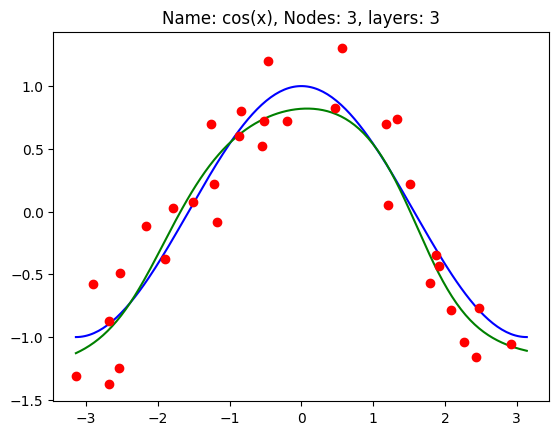

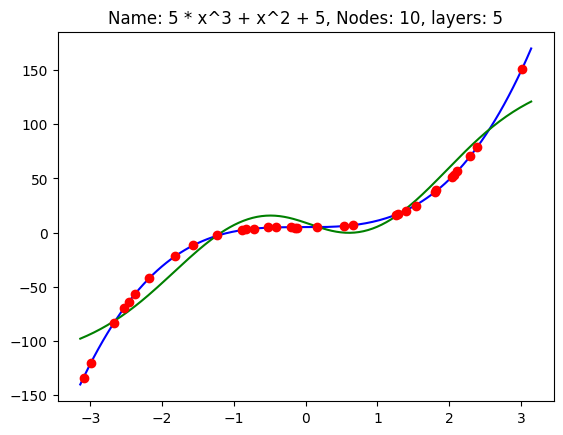

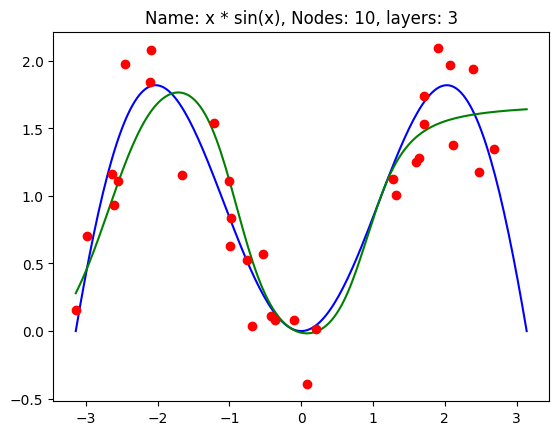

In [15]:
do_all(error_uniform, func1, 'cos(x)')
do_all(error_uniform, func2, '5 * x^3 + x^2 + 5')
do_all(error_uniform, func3, 'x * sin(x)')